# TikTok

## О компании
TikTok – это приложение, позволяющее пользователям создавать и публиковать короткие видеоролики длительностью 15 секунд на различные темы. Пользователи могут использовать различные эффекты, такие как фильтры, фоновая музыка и стикеры, для создания забавных и разнообразных видеороликов, часто с постановочным характером. Общее количество загрузок TikTok по всему миру достигло отметки в 1,5 миллиарда. Приблизительно треть всех активных пользователей приложения – подростки.

## Цель проекта

Цель проекта состоит в проведении логистической регрессии с использованием статуса верификации пользователя в качестве зависимой переменной. Это позволит выявить, какие характеристики видеороликов связаны с верификацией пользователей. Полученные результаты будут использованы для улучшения модели, предназначенной для определения, является ли видео **утверждением** или **мнением**, что, в свою очередь, поможет оптимизировать обработку пользовательских жалоб и повысить эффективность их приоритизации.

- **Утверждение (Claim)**: Это может быть видео, в котором пользователь представляет какие-то факты, делает заявления или высказывает что-то, что имеет объективный характер и, в принципе, может быть проверено на достоверность.
- **Мнение (Opinion)**: Здесь речь идет о видеороликах, где пользователь выражает свои личные взгляды, чувства, или оценки, которые могут быть субъективными и необъективными.

## Этап 1. Импорт
- Импорт библиотек
- Загрузка набора данных

### Импорт библиотек

In [ ]:
# Для работы с данными
import pandas as pd
import numpy as np

# Для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Для предварительной обработки данных
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Для моделирования данных
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Загрузка набора данных

In [ ]:
# Загрузка данных из файла с именем 'tiktok_dataset.csv'
data = pd.read_csv("tiktok_dataset.csv")

## Этап 2. Исследование данных

- Понимание переменных
- Очистка набора данных (недостающие данные, избыточные данные, отклонения)
- Визуализация

### Вывод основной информации о данных

In [ ]:
# Вывод нескольких строк набора данных
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
# Вывод количества строк и столбцов
data.shape

(19382, 12)

In [ ]:
# Получение типов данных столбцов
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [ ]:
# Вывод информации о структуре данных и типах данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [ ]:
# Вывод основной статистической информации о числовых данных
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### Удаление пропущенных значений

In [ ]:
# Подсчет пропущенных значений в каждом столбце
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [ ]:
# Удаление строк с отсутствующими значениями
data = data.dropna(axis=0)

In [ ]:
# Вывод нескольких строк набора данных
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
# Проверка на наличие дубликатов
data.duplicated().sum()

0

### Визуализация

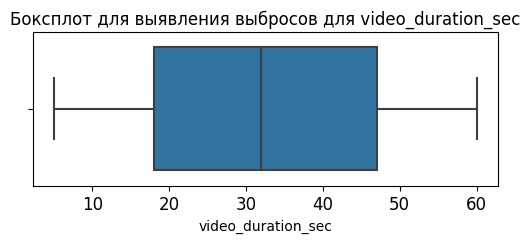

In [ ]:
# Создание графика для визуализации распределения `video_duration_sec`
plt.figure(figsize=(6,2))
plt.title('Боксплот для выявления выбросов для video_duration_sec', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_duration_sec'])
plt.show()

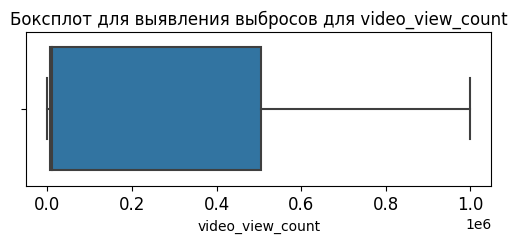

In [ ]:
# Создание графика для визуализации распределения `video_view_count`
plt.figure(figsize=(6,2))
plt.title('Боксплот для выявления выбросов для video_view_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_view_count'])
plt.show()

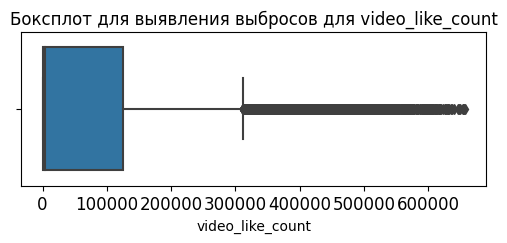

In [ ]:
# Создание графика для визуализации распределения `video_like_count`
plt.figure(figsize=(6,2))
plt.title('Боксплот для выявления выбросов для video_like_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_like_count'])
plt.show()

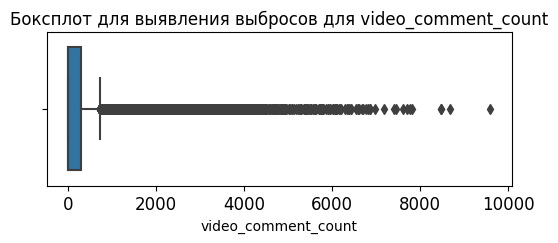

In [ ]:
# Создание графика для визуализации распределения `video_comment_count`
plt.figure(figsize=(6,2))
plt.title('Боксплот для выявления выбросов для video_comment_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_comment_count'])
plt.show()

### Обработка данных

In [ ]:
# Проверка и обработка выбросов

percentile25 = data["video_like_count"].quantile(0.25)
percentile75 = data["video_like_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

In [ ]:
# Проверка и обработка выбросов

percentile25 = data["video_comment_count"].quantile(0.25)
percentile75 = data["video_comment_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit

In [ ]:
# Проверка баланса классов
data["verified_status"].value_counts(normalize=True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

Примерно 94,2% массива данных составляют видеоролики, размещенные непроверенными аккаунтами, и 5,8% - видеоролики, размещенные проверенными аккаунтами. Таким образом, итоговая переменная не очень хорошо сбалансирована.

In [ ]:
# Выявление точек данных из классов большинства и меньшинства
data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]

# Увеличение выборки меньшинства (которое "проверено")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # для выборки с замещением
                                 n_samples=len(data_majority), # для соответствия классу большинства
                                 random_state=0)               # создание воспроизводимых результатов

# Объединение класса большинства с увеличенной выборкой класса меньшинств
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Отображение количества новых классов
data_upsampled["verified_status"].value_counts()

not verified    17884
verified        17884
Name: verified_status, dtype: int64

Получим среднюю длину `video_transcription_text` для видео, размещенных верифицированными аккаунтами, и среднюю длину `video_transcription_text` для видео, размещенных неверифицированными аккаунтами.



In [ ]:
# Получение средней длины `video_transcription_text` для утверждений и средней длины `video_transcription_text` для мнений
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Извлечем длину каждого `video_transcription_text` и добавим ее в качестве столбца в набор данных, чтобы использовать ее в качестве потенциального признака в модели.

In [ ]:
# Извлечение длины каждого `video_transcription_text` и добавление ее в качестве столбца в набор данных
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))

In [ ]:
# Отображение первых нескольких строк набора данных после добавления нового столбца
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


### Корреляционный анализ

Составим корреляционную матрицу, которая поможет определить наиболее коррелированные переменные.

In [ ]:
# Кодирование корреляционной матрицы для определения наиболее коррелированных переменных
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


Исследуем взаимосвязи между различными переменными в наборе данных. Для этого визуализируем корреляционную тепловую карту данных.

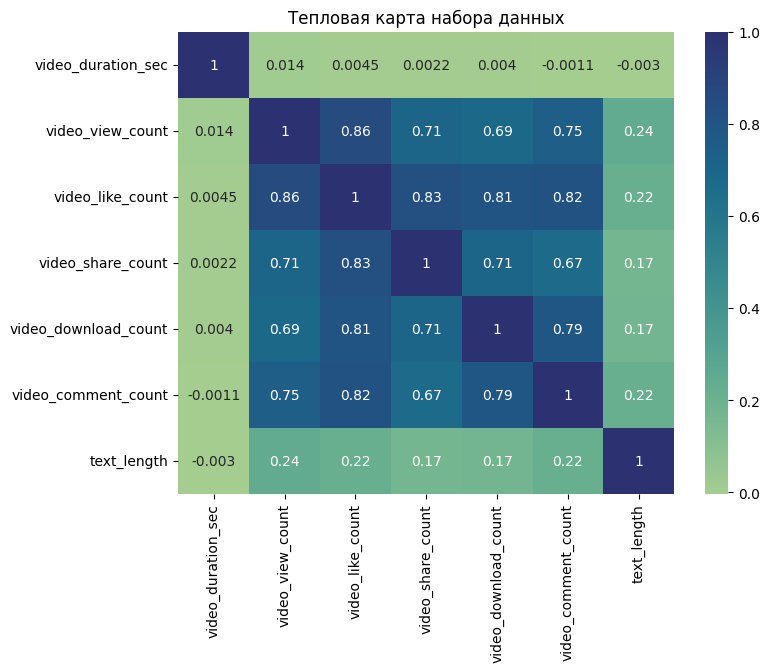

In [ ]:
# Создание тепловой карты для визуализации степени корреляции переменных
plt.figure(figsize=(8, 6))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count",
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(numeric_only=True),
    annot=True,
    cmap="crest")
plt.title("Тепловая карта набора данных")
plt.show()

Приведенная тепловая карта показывает, что следующие пары переменных сильно коррелируют между собой: `video_view_count` и `video_like_count` (коэффициент корреляции 0,86).

Одним из предположений модели логистической регрессии является отсутствие сильной мультиколлинеарности между признаками. Чтобы построить модель логистической регрессии, удовлетворяющую этому предположению, можно исключить `video_like_count`. А среди переменных, количественно оценивающих показатели видео, можно оставить в качестве признаков `video_view_count`, `video_share_count`, `video_download_count` и `video_comment_count`.

## Этап 3. Построение регрессии

### Выбор переменных

Задаем переменные Y и X.

Выберем переменную результата.

In [ ]:
# Выбор переменной результата
y = data_upsampled["verified_status"]

Выберем характеристики.

In [ ]:
# Выбор характеристик
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

# Вывод нескольких строк набора данных
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


Столбцы `#` и `video_id` не выбраны в качестве признаков, поскольку они, по-видимому, не помогают предсказать, представляет ли видеоролик утверждение или мнение. Также в качестве признака не выбран `video_like_count`, поскольку он сильно коррелирует с другими признаками, как обсуждалось ранее. А логистическая регрессия имеет предположение об отсутствии мультиколлинеарности модели, которое должно быть выполнено.

### Разбиение данных на обучающую и тестовую выборки.

In [ ]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Проверим, что размеры обучающего и тестового наборов совпадают.

In [ ]:
# Получение размерности каждого обучающего и тестового множества
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

- Количество признаков (`7`) соответствует набору для обучения и тестирования.
- Количество строк совпадает между признаками и переменной результата для обучения (`26826`) и тестирования (`8942`).

### Кодирование переменных

In [ ]:
# Проверка типов данных характеристик
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [ ]:
# Получение уникальных значений в `claim_status`
X_train["claim_status"].unique()

array(['opinion', 'claim'], dtype=object)

In [ ]:
# Получение уникальных значений в `author_ban_status`
X_train["author_ban_status"].unique()

array(['active', 'under review', 'banned'], dtype=object)

Как показано выше, признаки `claim_status` и `author_ban_status` в настоящее время имеют тип данных `object`. Для работы с реализациями моделей через `sklearn` эти категориальные признаки необходимо будет сделать числовыми. Одним из способов сделать это является одноточечное кодирование.

Кодирование категориальных признаков в обучающем наборе.

In [ ]:
# Выбор обучающих функций, которые необходимо закодировать
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

# Отображение первых нескольких строк
X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [ ]:
# Настройка кодера для одномоментного кодирования категориальных признаков
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
# Настройка и преобразование обучающих признаков с помощью кодера
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [ ]:
# Получение имен функций из кодировщика
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [ ]:
# Отображение первых нескольких строк кодированных обучающих признаков
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
# Поместить закодированные обучающие признаки (которые в данный момент представляют собой массив) в кадр данных
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Отображение первых нескольких строк
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
# Отобразим первые несколько строк `X_train` с опущенными столбцами `claim_status` и `author_ban_status`
# (поскольку эти признаки преобразуются в числовые)
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


In [ ]:
# Конкатенация `X_train` и `X_train_encoded_df` для формирования конечного кадра данных для обучения (`X_train_final`)
# Примечание: Использование `.reset_index(drop=True)` для сброса индекса в X_train после сброса `claim_status` и `author_ban_status`,
# чтобы индексы совпадали с индексами в `X_train_encoded_df` и `count_df`.
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Отображение первых нескольких строк
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# Проверка типа данных переменной результата
y_train.dtype

dtype('O')

In [ ]:
# Получение уникальных значений переменной результата
y_train.unique()

array(['verified', 'not verified'], dtype=object)

Как показано выше, в настоящее время переменная outcome имеет тип данных `object`.

Закодируем категориальные значения переменной результата в обучающем наборе.

In [ ]:
# Настройка кодера для кодирования категориальной переменной
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
# Кодировка переменной результата обучения
# Примечания:
# - Корректировка формы `y_train` перед передачей в `.fit_transform()`, так как она принимает двумерный массив.
# - Использование `.ravel()` для сглаживания массива, возвращаемого `.fit_transform()`, чтобы в дальнейшем его можно было использовать для обучения модели
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Отображение закодированной переменной результата обучения
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

### Построение модели

Построим модель и настроим ее к обучающему набору данных.

In [ ]:
# Создание модели логистической регрессии и настройка ее под обучающий набор
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

### Этап 4. Результаты и оценка

Кодируем категориальные признаки в тестовом наборе.

In [ ]:
# Выбор функции тестирования, которые необходимо закодировать
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Отображение первых нескольких строк
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [ ]:
# Преобразование тестируемых признаков с помощью кодера
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Отображение первых нескольких строк кодированных признаков тестирования
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
# Создание набора данных из закодированных данных, используя имена признаков из `X_encoder`
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Отображение первых нескольких строк
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
# Отображение первых нескольких строк `X_test` с пропущенными столбцами `claim_status` и `author_ban_status` (поскольку эти функции преобразуются в числовые значения).
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118.0,57.0,5.0,2.0
31748,27,5701.0,157.0,1.0,0.0
20197,31,449767.0,75385.0,5956.0,728.5
5727,19,792813.0,56597.0,5146.0,728.5
11607,54,2044.0,68.0,19.0,2.0


In [ ]:
# Объединение `X_test` и `X_test_encoded_df`, чтобы сформировать окончательный набор данных для обучающих данных (`X_test_final`)
# Использование `.reset_index(drop=True)` для сброса индекса в X_test после удаления `claim_status` и `author_ban_status`,
# чтобы индексы совпадали с индексами в `X_test_encoded_df` и `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Отобразить первые несколько строк
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,728.5,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


Проверим модель логистической регрессии. Используем модель, чтобы делать прогнозы на закодированном тестовом наборе.

In [ ]:
# Использование модели логистической регрессии для получения прогнозов на закодированном наборе тестов
y_pred = log_clf.predict(X_test_final)

In [ ]:
# Отображение прогнозов на закодированном наборе тестов
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

In [ ]:
# Отображение истинных меток набора тестов
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

Закодируем истинные метки набора тестов, чтобы их можно было сравнить с прогнозами.

In [ ]:
# Кодирование переменной результата тестирования
# Примечания:
# - Корректировка формы `y_test` перед передачей в `.transform()`, так как он принимает двумерный массив.
# - Использование `.ravel()` для сглаживания массива, возвращаемого `.transform()`, чтобы в дальнейшем его можно было использовать для сравнения с предсказаниями
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Вывод закодированной переменной результата тестирования
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

Еще раз убедимся, что размеры обучающего и тестового множеств совпадают, поскольку были добавлены дополнительные признаки.

In [ ]:
# Получение размеров данных обучающего и тестового набора данных
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

- Количество признаков (`8`) соответствует набору для обучения и тестирования.
- Количество строк совпадает между признаками и переменной результата для обучения (`26826`) и тестирования (`8942`).

#### Визуализация результатов моделирования

Создадим матрицу путаницы для визуализации результатов модели логистической регрессии.

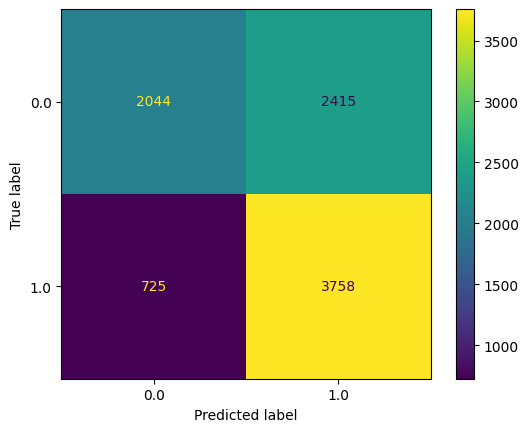

In [ ]:
# Вычисленияе значения для матрицы смешения
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Создание отображения матрицы путаницы
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Построение матрицы смешения
log_disp.plot()

# Отображение графика
plt.show()

In [ ]:
(3758+2044) / (3758 + 725 + 2044 + 2415)

0.6488481324088571

В **левом верхнем квадранте** показано количество истинных отрицательных результатов: количество видеороликов, размещенных непроверенными аккаунтами, которые модель точно классифицировала как таковые.

В **правом верхнем квадранте** показано количество ложноположительных результатов: количество видеороликов, размещенных непроверенными аккаунтами, которые модель ошибочно классифицировала как размещенные верифицированными аккаунтами.

В **левом нижнем квадранте** показано количество ложноотрицательных результатов: количество видеороликов, размещенных верифицированными аккаунтами, которые модель ошибочно классифицировала как размещенные неверифицированными аккаунтами.

В **правом нижнем квадранте** показано количество истинно положительных результатов: количество видеороликов, размещенных верифицированными аккаунтами, которые модель точно классифицировала как таковые.

Идеальная модель давала бы все истинно отрицательные и истинно положительные результаты и не имела бы ни одного ложноотрицательного или ложноположительного результата.

Создадим отчет о классификации, включающий метрики precision, recall, f1-score и accuracy для оценки эффективности модели логистической регрессии.

In [ ]:
# Создание классификационного отчета для модели логистической регрессии
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.46      0.57      4459
not verified       0.61      0.84      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.64      8942
weighted avg       0.67      0.65      0.64      8942



Приведенный выше отчет о классификации показывает, что модель логистической регрессии достигла точности 61%, отзыва 84% и точности 65%. Обратите внимание на то, что показатели точности и запоминания взяты из строки "not verified", поскольку именно этот целевой класс нас больше всего интересует для прогнозирования. Класс "проверенные" имеет свои собственные показатели точности/отдачи, а средневзвешенное значение представляет собой комбинированные показатели для обоих классов целевой переменной.

#### Интерпретация коэффициентов модели

In [ ]:
# Вывод имен признаков из модели и коэффициенты модели (которые представляют собой отношения логарифмических коэффициентов)
# Поместить в DataFrame для удобства чтения
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,8.607893e-03
1,video_view_count,-2.132079e-06
2,video_share_count,5.930971e-06
3,video_download_count,-1.099775e-05
4,video_comment_count,-6.404235e-04
5,claim_status_opinion,3.908384e-04
6,author_ban_status_banned,-1.781741e-05
7,author_ban_status_under review,-9.682447e-07


## Заключение

Основные выводы:

- В наборе данных имеется несколько сильно коррелированных переменных, что может привести к проблемам мультиколлинеарности при построении модели логистической регрессии. Мы решили исключить `video_like_count` из построения модели.
- Согласно модели логистической регрессии, каждая дополнительная секунда видео связана с увеличением log-odds на 0,009 с тем, что пользователь имеет подтвержденный статус.
- Модель логистической регрессии обладает не очень большой, но приемлемой предсказательной способностью: точность 61% - это меньше, чем идеальный результат, но отзыв 84% - это очень хорошо. Общая точность находится на нижней границе того, что обычно считается приемлемым.


Мы разработали модель логистической регрессии для определения статуса верификации на основе характеристик видео. Модель обладает хорошей предсказательной способностью. Согласно оценкам коэффициентов модели, полученным с помощью логистической регрессии, более длинные видеоролики, как правило, связаны с более высокими шансами на то, что пользователь будет верифицирован. Другие характеристики видео имеют небольшие расчетные коэффициенты в модели, поэтому их связь со статусом верификации представляется незначительной.